In [1]:
# %load ../../framework_for_labs/scripts/python_lib.py
#!/usr/bin/env python3

import sys
import os
import numpy as np
import subprocess
import pandas as pd
import pyperclip
import math
import matplotlib.pyplot as plt

#write_as_column - outputs as table column
#vertical=True - outputs a transponded version
#vertical=False - outputs a non transponded version
#if total_rows > amount of resulting rows then add empty elements
#if total_columns > amount of resulting columns then add empty columns

def arr_to_tex (arr:np.ndarray, outfile:str = '/dev/null', append:bool = False, to_clip:bool = False, precision=2, as_column:bool=False, vertical:bool=False, header:bool=True, col_total:int=0, row_total:int=0, caption:str = ''):
    tex_out =''
    if (header):
        tex_out += '\n\\begin{table}[H]\n\\caption{' + caption + '}\n\\begin{center}\n\\begin{tabular}{|c|*{15}{c|}}\\hline\n'

    if (arr.ndim == 1):
        for i in arr:
            if (isinstance (i, str)): tex_out += i
            else: tex_out += str (round (i, precision))
            tex_out += ' & '
            if (as_column): tex_out += '\n'
        if (as_column): tex_out += ' & \n' * max (0, row_total - len (arr))
        else: tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - len (arr)) + '\\\\\\hline\n'
    elif (arr.ndim == 2):
        if (vertical):
            row_n = arr.shape[0]
            col_n = arr.shape[1]
            for i in range (row_n):
                for j in range (col_n):
                    if (isinstance (arr[j][i], str)): tex_out += arr[j][i]
                    else: tex_out += str (round (arr[j][i], precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total
        else:
            row_n = arr.shape[1]
            col_n = arr.shape[0]
            for i in arr:
                for j in i:
                    if (isinstance (j, str)): tex_out += j
                    else: tex_out += str (round (j, precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total

    if (header): tex_out += '\\end{tabular}\n\\end{center}\n\\end{table}\n\n'

    if (to_clip):
        clip_content = ''
        if (append): clip_content = pyperclip.paste ()
        clip_content += tex_out
        pyperclip.copy (clip_content)

    open_str = 'w'
    if (append): open_str = 'a'

    with open (outfile, open_str) as output:
        print (tex_out, file = output)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 2.2
L = 100 * 10 **-3
R = 0.01

dt_0 = 64.8 * 10 **-6 #sec, zero capacity
C_0 = dt_0 / ((2 * np.pi) ** 2 / L) * 10 **-3

# measurments of period dependent on capacity

C =  np.array ([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]) * 10**-6
dt = np.array ([90.8, 112,    129,   145,   156,   166,  181,    189,   204]) * 10 **-6


In [3]:
# 2.3

C_star = 5 * 10**-9
R_cr_teor = 2 * np.sqrt (L/C_star)
R_cr_real = 7400
R_cr_real * 0.05
Sigma_0 = np.log (864 / 604)

R           =                   [370      , 740,  1100, 1480, 1850, 2200, 2590]
Sigma       = np.log (np.array( [864 / 604, 804 / 428, 768 / 296, 728 / 204, 684 / 136, 644 / 84, 612 / 56]))
R_cr_real, R_cr_teor


(7400, np.float64(8944.27190999916))

In [4]:
# 2.4

R =                         [1600,      1200, 800, 600, 400]
Sigma = np.log (np.array (  [204 / 102, 172 / 104, 136 / 96, 108 / 88, 78 / 70]))

[5700.         5911.11111111 6122.22222222 6333.33333333 6544.44444444
 6755.55555556 6966.66666667 7177.77777778 7388.88888889 7600.        ]
[5000.         5157.89473684 5315.78947368 5473.68421053 5631.57894737
 5789.47368421 5947.36842105 6105.26315789 6263.15789474 6421.05263158
 6578.94736842 6736.84210526 6894.73684211 7052.63157895 7210.52631579
 7368.42105263 7526.31578947 7684.21052632 7842.10526316 8000.        ]


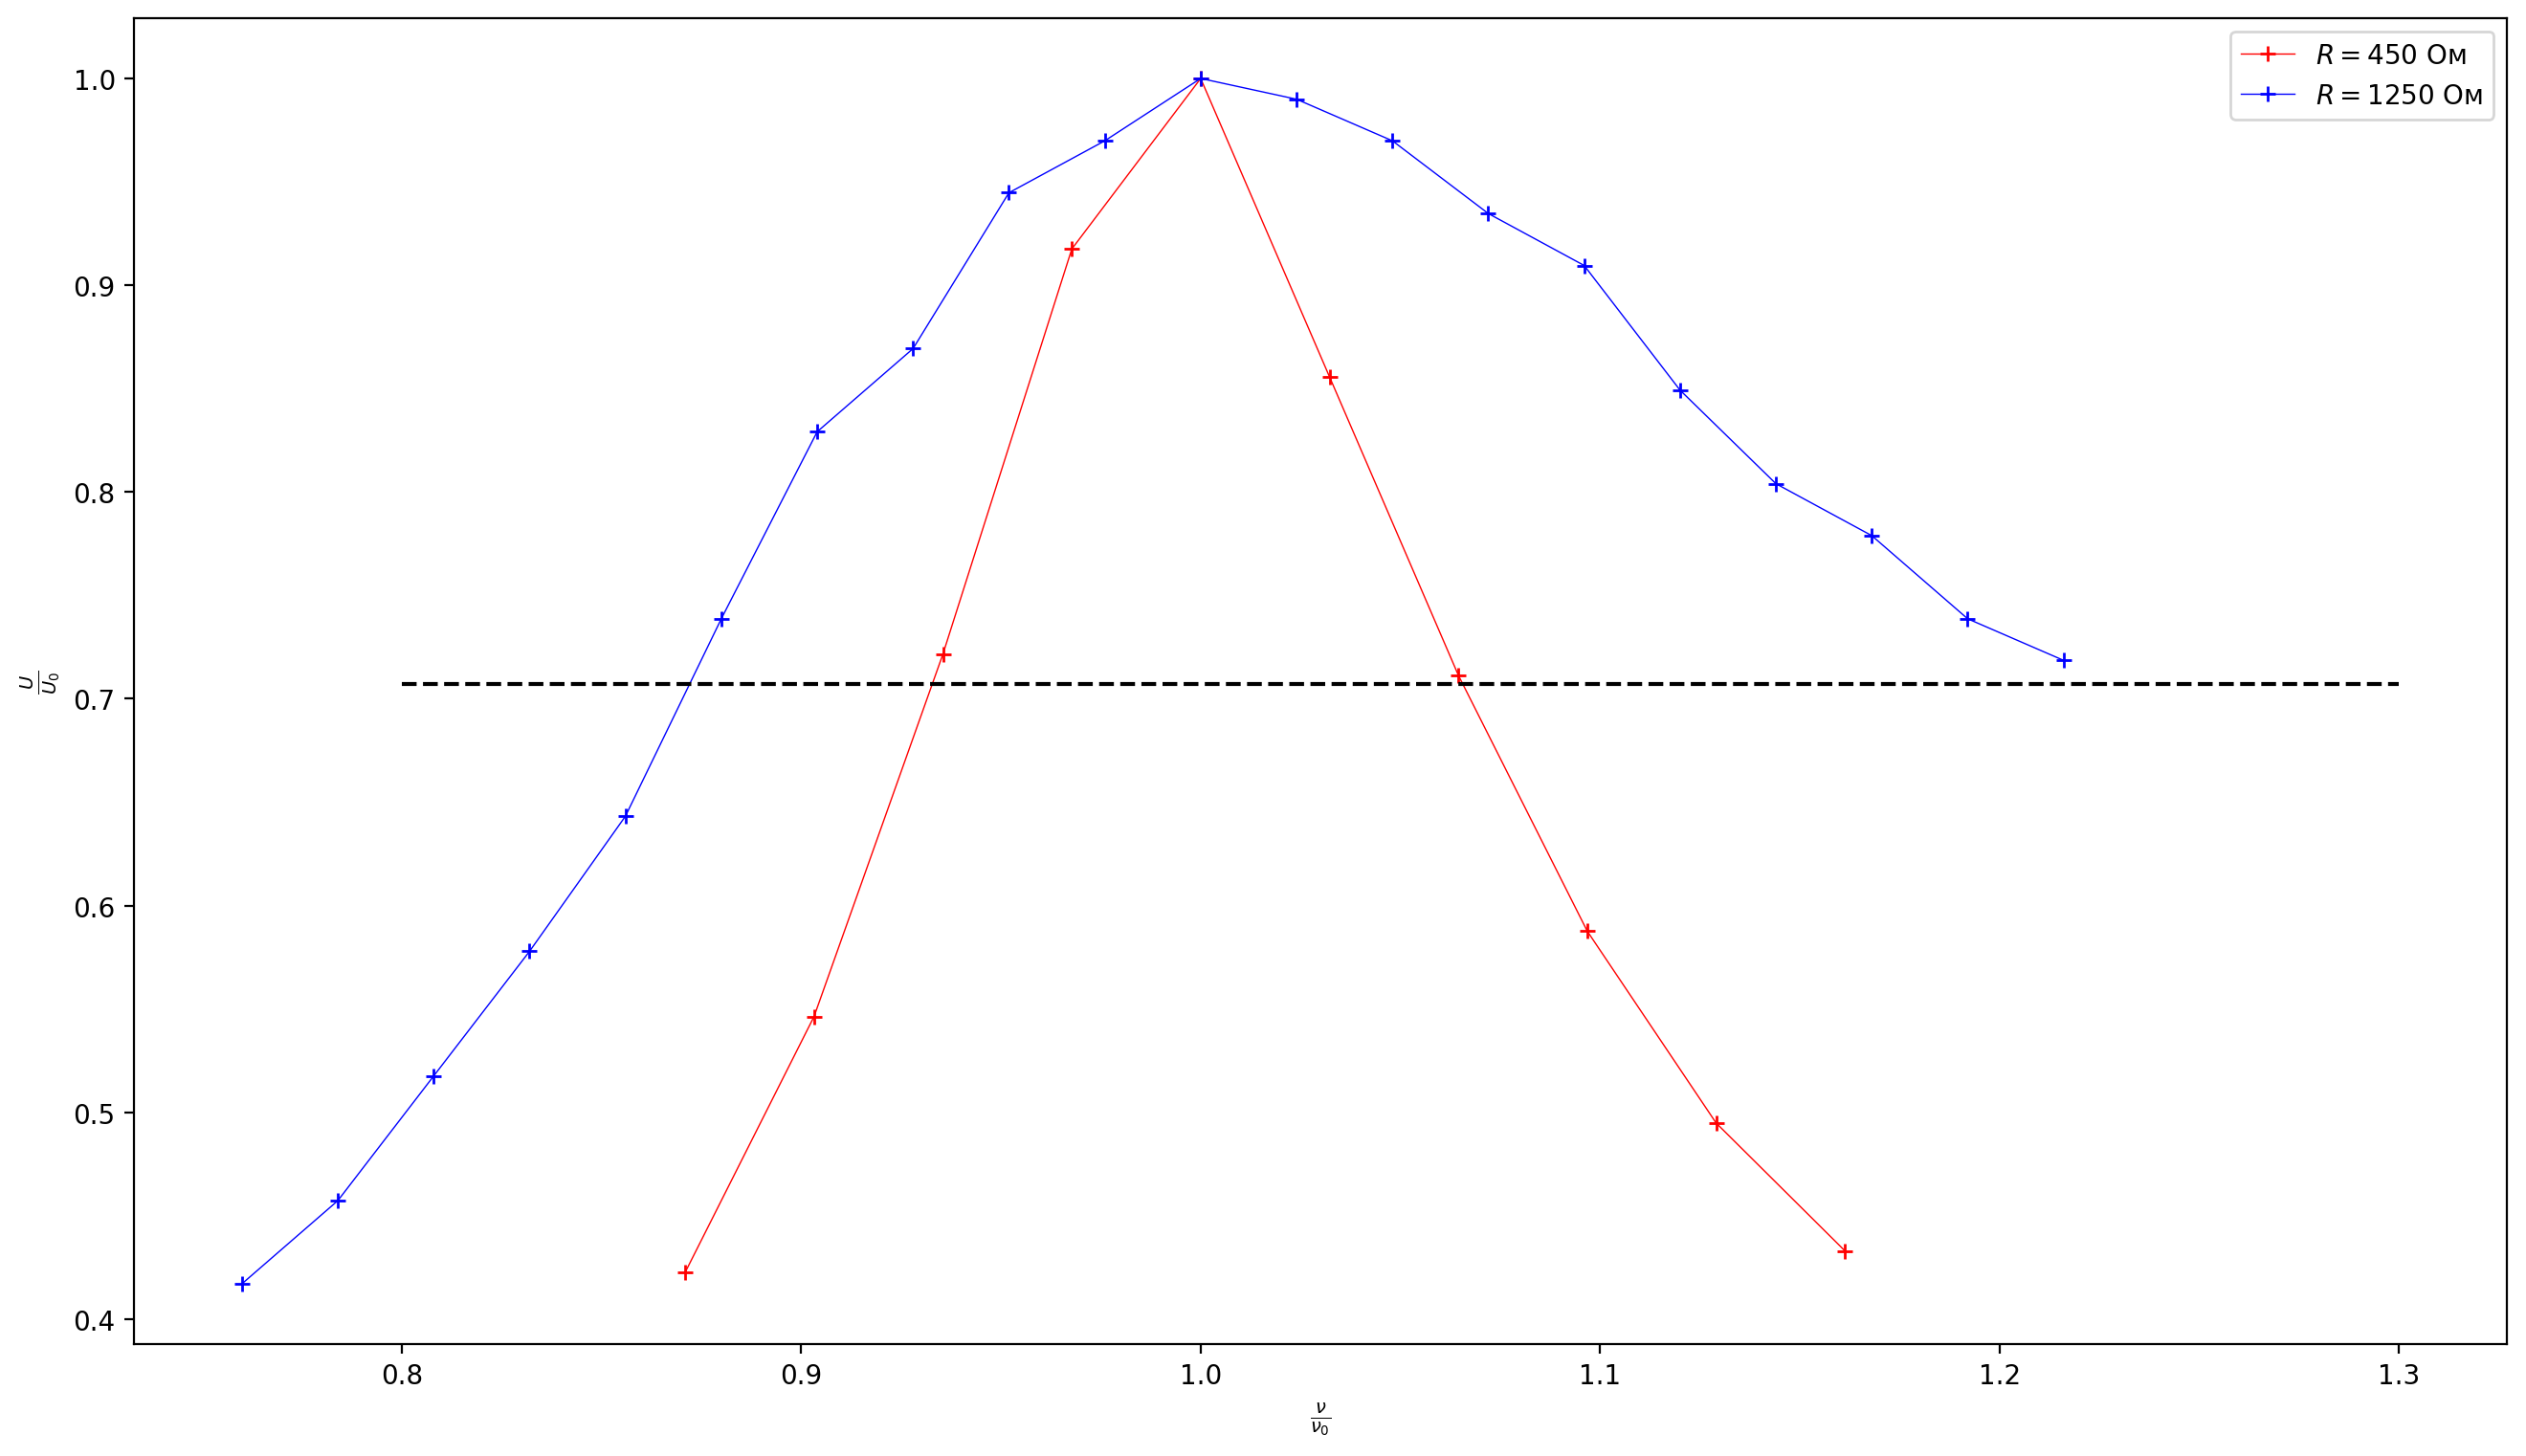

In [5]:
#2.5

freq = 6500
R_1 = 450
U_c_res = 9.7

delta_freq = np.linspace (5700, 7600, num = 10)
print (delta_freq)
U_1 = [4.1, 5.3, 7, 8.9, 9.7, 8.3, 6.9, 5.7, 4.8, 4.2]

# for i in range (len (U)):
#     print (str(delta_freq[i]) + " : " + str (U[i]))

delta_freq = np.array (delta_freq) / 6544.44
U = np.array (U_1) / 9.7

plt.figure (figsize=(16, 9), dpi=200)
plt.ylabel (r'$\frac{U}{U_0}$')
plt.xlabel (r'$\frac{\nu}{\nu_0}$')
plt.plot (delta_freq, U, color = 'red', linestyle = '-', marker = '+', linewidth = 0.5, markersize = 6, label=r'$R = 450$ Ом')

R_2 = 1250

delta_freq_2 = np.linspace (5000, 8000, num = 20)
print (delta_freq_2)
U_2 = [1.66, 1.82, 2.06, 2.3, 2.56, 2.94, 3.3, 3.46, 3.76, 3.86, 3.98, 3.94, 3.86, 3.72, 3.62, 3.38, 3.2, 3.1, 2.94, 2.86]

# for i in range (len (U)):
#     print (str(delta_freq_2[i]) + " : " + str (U[i]))

delta_freq_2 = np.array (delta_freq_2) / 6578.94
U = np.array (U_2) / 3.98

plt.plot (delta_freq_2, U, color = 'blue', linestyle = '-', marker = '+', linewidth = 0.5, markersize = 6, label=r'$R = 1250$ Ом')
plt.plot (np.linspace (0.8, 1.3, 20), [1 / np.sqrt (2)]*20, color = 'black', linestyle='--')
plt.legend ()
plt.show ()



In [6]:
# 2.6

R = 450
U_0 = 9.8

# нарастание [большая, меньшая]
Sigma = [[5.4, 3.4], [6.8, 5.4], [8, 6.9], [8.6, 7.9]]
# убывание
Sigma_1 = [[9.4, 6.3], [6.3, 4.2], [4.2, 3.0], [3, 2]]

R = 1250

U_0 = 4.28
# up
Sigma = [[2.84, 1.2], [3.68, 2.84], [4.08, 3.8]]

Sigma_1 = [[4.28, 4], [4, 1.6], [1.6, 0.84]]


freq = [50, 500, 1500, 6500]
R_c = [9455, 27.8, 17, 4.2]
C = [0.00508, 0.00513, 0.00513, 0.00512] #mf

L = [0.1,  0.09998, 0.9998, 0.101] #Henry
R = [44.6, 44.3, 45.9, 69.5]